### Load R libraries

In [1]:
library(dviz.supp)
library(forcats)
# library(patchwork)
library(lubridate)

Loading required package: cowplot

Loading required package: colorspace

Loading required package: colorblindr

Loading required package: ggplot2

Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘dviz.supp’


The following objects are masked from ‘package:cowplot’:

    plot_grid, stamp, stamp_bad, stamp_good, stamp_ugly, stamp_wrong


The following object is masked from ‘package:datasets’:

    CO2



Attaching package: ‘lubridate’


The following object is masked from ‘package:dviz.supp’:

    stamp


The following object is masked from ‘package:cowplot’:

    stamp


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




### Structure of the data

In [2]:
head(ncdc_normals)

station_id,month,day,temperature,flag,date
<chr>,<chr>,<chr>,<dbl>,<chr>,<date>
AQW00061705,01,1,82.4,C,0-01-01
AQW00061705,01,2,82.4,C,0-01-02
AQW00061705,01,3,82.4,C,0-01-03
AQW00061705,01,4,82.4,C,0-01-04
AQW00061705,01,5,82.4,C,0-01-05
AQW00061705,01,6,82.4,C,0-01-06


### Preprocess the data

- add location column

In [3]:
temps_long <- filter(ncdc_normals,
                station_id %in% c(
                  "USW00014819", # Chicago, IL 60638
                  #"USC00516128", # Honolulu, HI 96813
                  #"USW00027502", # Barrow, AK 99723, coldest point in the US
                  "USC00042319", # Death Valley, CA 92328 hottest point in the US
                  "USW00093107", # San Diego, CA 92145
                  #"USC00427606"  # Salt Lake City, UT 84103
                  "USW00012918" # Houston, TX 77061
                )) %>%
  mutate(location = fct_recode(factor(station_id),
                               "Chicago" = "USW00014819",
                               #"Honolulu, HI" = "USC00516128",
                               #"Barrow, AK" = "USW00027502",
                               "Death Valley" = "USC00042319",
                               "San Diego" = "USW00093107",
                               #"Salt Lake City, UT" = "USC00427606",
                               "Houston" = "USW00012918")) %>%
  mutate(location = factor(location, levels = c("Death Valley", "Houston", "San Diego", "Chicago")))

head(temps_long)

station_id,month,day,temperature,flag,date,location
<chr>,<chr>,<chr>,<dbl>,<chr>,<date>,<fct>
USC00042319,01,1,51.0,S,0-01-01,Death Valley
USC00042319,01,2,51.2,S,0-01-02,Death Valley
USC00042319,01,3,51.3,S,0-01-03,Death Valley
USC00042319,01,4,51.4,S,0-01-04,Death Valley
USC00042319,01,5,51.6,S,0-01-05,Death Valley
USC00042319,01,6,51.7,S,0-01-06,Death Valley


### Create the plot using `ggplot2`

In [4]:
hjust <- 0.5
tikz_plot <- ggplot(temps_long, aes(x = date, y = temperature, color = location)) +
  geom_line(linewidth = 1) +
  scale_x_date(name = "month", 
               limits = c(ymd("0000-01-01"), ymd("0001-01-04")),
               breaks = c(ymd("0000-01-01"), ymd("0000-04-01"), ymd("0000-07-01"),
                          ymd("0000-10-01"), ymd("0001-01-01")),
               labels = c("Jan", "Apr", "Jul", "Oct", "Jan"), expand = c(1/366, 0)) + 
  scale_y_continuous(limits = c(19.9, 107),
                     breaks = seq(20, 100, by = 20),
                     name = "temperature (°F)") +
  scale_color_OkabeIto(order = c(1:3, 7), name = NULL) +
  theme_dviz_grid() +
  # theme(legend.title.align = 0.5)
  theme(legend.title = element_text(hjust))

### Visualize the plots

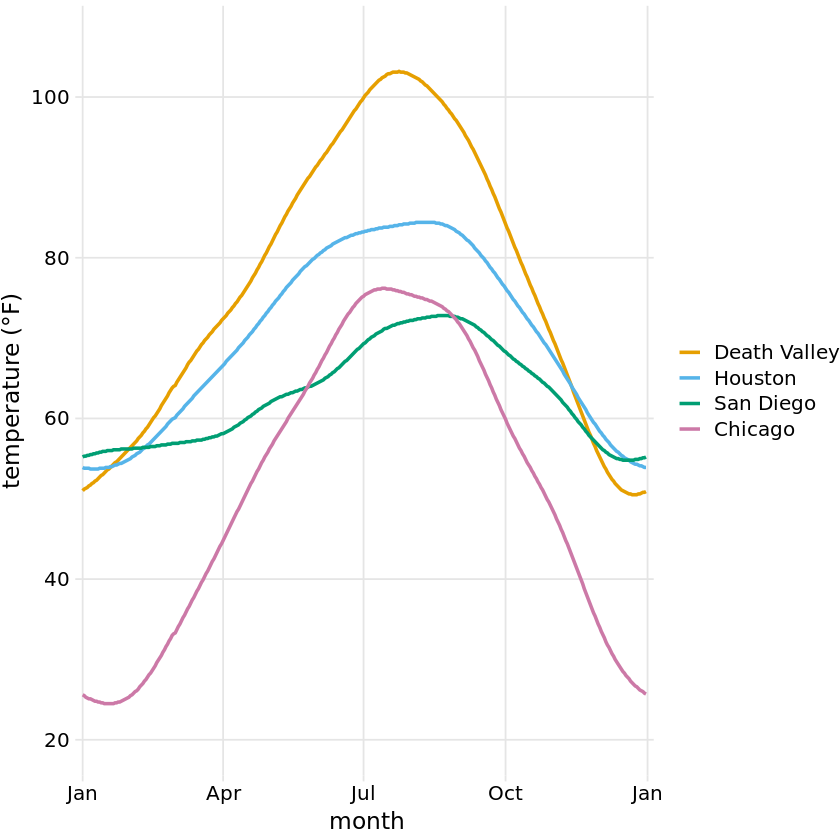

In [5]:
tikz_plot

### Save the plot using LaTex Tikz

In [6]:
# library
library(tikzDevice)

In [7]:
print("Creating tex file ...")

tex_file = "temperature_plot_tikz.tex"

# Create a .tex file that will contain your plot as vectors
# You need to set the size of your plot here in inches
tikz(file = tex_file, width = 7, height = 5, standAlone= TRUE, engine="luatex")
    
    # the plot
    tikz_plot

# Necessary to close or the tikxDevice .tex file will not be written
dev.off()


[1] "Creating tex file ..."


png 
  2

### Save the visualization as a pdf file

In [ ]:
print("Creating pdf file ...")

# tinytex::lualatex(tex_file)
system(paste("lualatex", tex_file))
print("Plot created")